# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
A = read.csv("anes_pilot_2018.csv")


In [3]:
head(A)

,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,⋯,rand_emp,rand_climate,rand_rural,rand_pk,rand_pid,starttime,endtime,duration,optintimestamp,completes
,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>
1,ANES 2018 Pilot Study main version 20190129,1,1.2555080,0.7286969,1,4,2,1,4,-1,⋯,1,2,2,1,1,12/10/2018 18:34:11,12/10/2018 20:00:03,5152,10/15/15,46
2,ANES 2018 Pilot Study main version 20190129,2,0.5694911,0.3305327,2,1,2,3,-1,-1,⋯,2,1,1,0,2,12/10/2018 19:26:37,12/10/2018 19:53:12,1595,7/16/16,55
3,ANES 2018 Pilot Study main version 20190129,3,0.9720616,0.5641846,1,4,3,3,-1,-1,⋯,2,2,1,1,2,12/10/2018 19:48:44,12/10/2018 20:21:21,1957,6/13/14,8
4,ANES 2018 Pilot Study main version 20190129,4,2.4500732,1.4220225,1,4,2,1,4,-1,⋯,2,2,1,0,1,12/10/2018 19:03:49,12/10/2018 19:21:08,1039,10/28/15,42
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,⋯,2,1,2,1,2,12/10/2018 18:28:14,12/10/2018 18:43:23,909,11/11/15,33
6,ANES 2018 Pilot Study main version 20190129,6,1.8184054,1.0554025,1,3,2,2,2,2,⋯,1,2,1,1,2,12/10/2018 23:58:17,12/11/2018 5:10:57,18760,5/9/15,185


Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 5000 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```


## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)

US citizens of age 18 or older were asked multiple questions in a 2018 study. Two of the questions regarded respondents feelings towards police and towards journalists. 

The exact questions were stated as such:

#### Question : How would you rate the police?

#### Question B: How would you rate journalists?

*Note that these questions are after many in the sequence, and could be affected by previous questions. 

The two variables are feelings toward police 'ftpolice' and feelings towards jounralists 'ftjournal'. 

The variables are operationalized by a widget ui using a thermometer widget and the user selecting an appropriate value about their feelings towards each subject. The temperature setting 0, stands for very cold or unfavorable feeling. The temperature setting 100 stands for very warm or favorable feeling and 50 is no feeling at all.

Below is the widget ui:


<img width=400 src="thermometer.png"></img>

These values from 0 to 100 stand for the respondents attitude are then compared to see if there is a favorability between feeling more positive to one group or the other, in this case police or journalists. 

Now, the question is asking:

#### "Do US voters have more respect for the police or for journalists?"

An issue with this question lies in the fact that this study was done on US citizens above the age of 18, not just US Voters. Some of these respondents may not be able to vote and it isn't limited to just US voters. I believe this issue is a small but important point of disctinction. 

Do we mean potential voters, or do we mean actual voters?

The next issue is with the word choice "respect"

While one could define respect as a feeling of deep admiration, or perhaps a due regard for the rights and traditions of others. It's unclear if this is being answered in this study, as the respondents are asked to measure their favorability. 

A more precise question we could answer is: 

#### "Are U.S. Citizens more favorable of police or journalists?" 

or 

#### "Did U.S. Citizens who voted in the 2018 election have a more favorable opinion of police or journalists?" 


Despite these small distinctions we can still apply our test to see if there is a stark difference between these two feelings amongst respondents. 


### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [48]:
#TODO: remove all people who didn't vote from these EDA
#TODO: ask about effect on removing data

print("Feelings About Police")
summary(A$ftpolice)

print("Feelings About Journalists")
summary(A$ftjournal)

my.theme <- theme_classic()  + theme(aspect.ratio = 1)

[1] "Feelings About Police"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

[1] "Feelings About Journalists"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



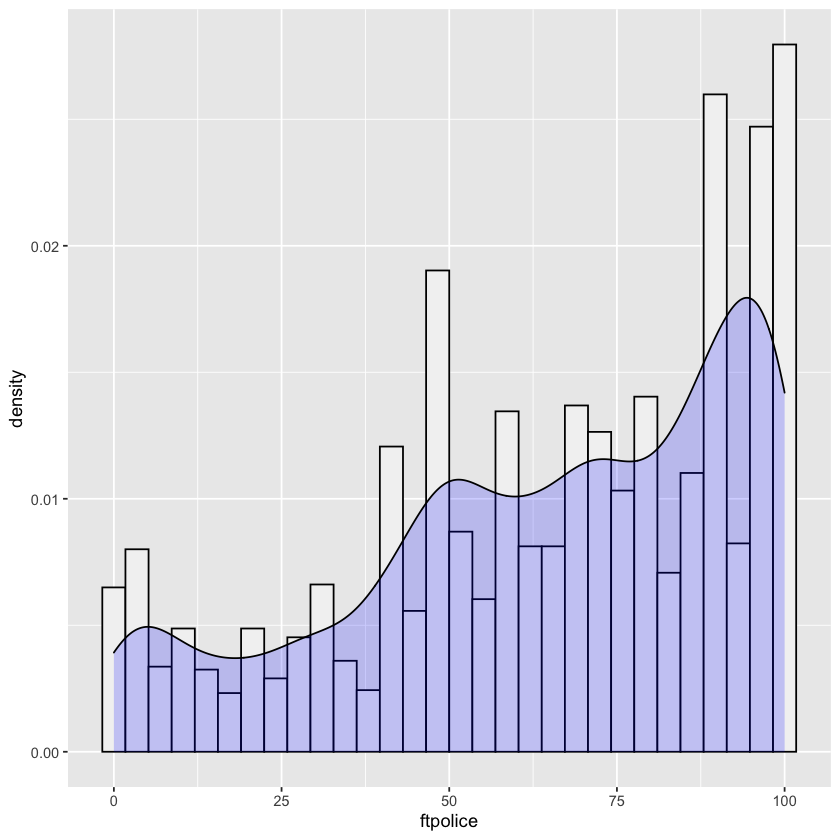

In [34]:
phist <- ggplot(A, aes(x=ftpolice)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="#f2f2f2")+
 geom_density(alpha=.2, fill="blue") 
phist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



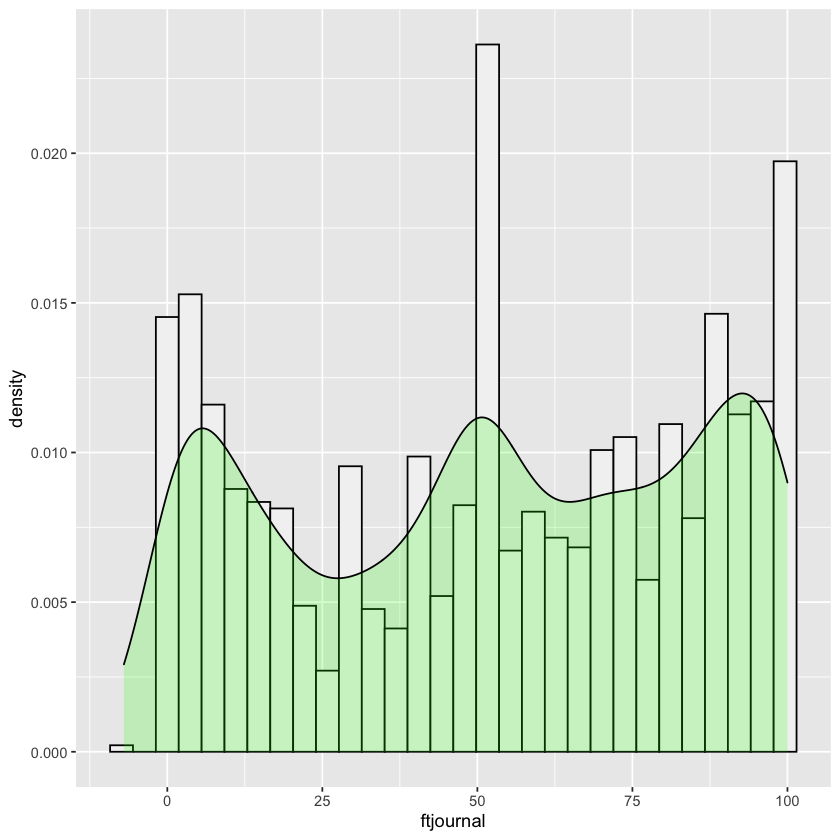

In [33]:
jhist <- ggplot(A, aes(x=ftjournal)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="#f2f2f2")+
 geom_density(alpha=.2, fill="green") 
jhist

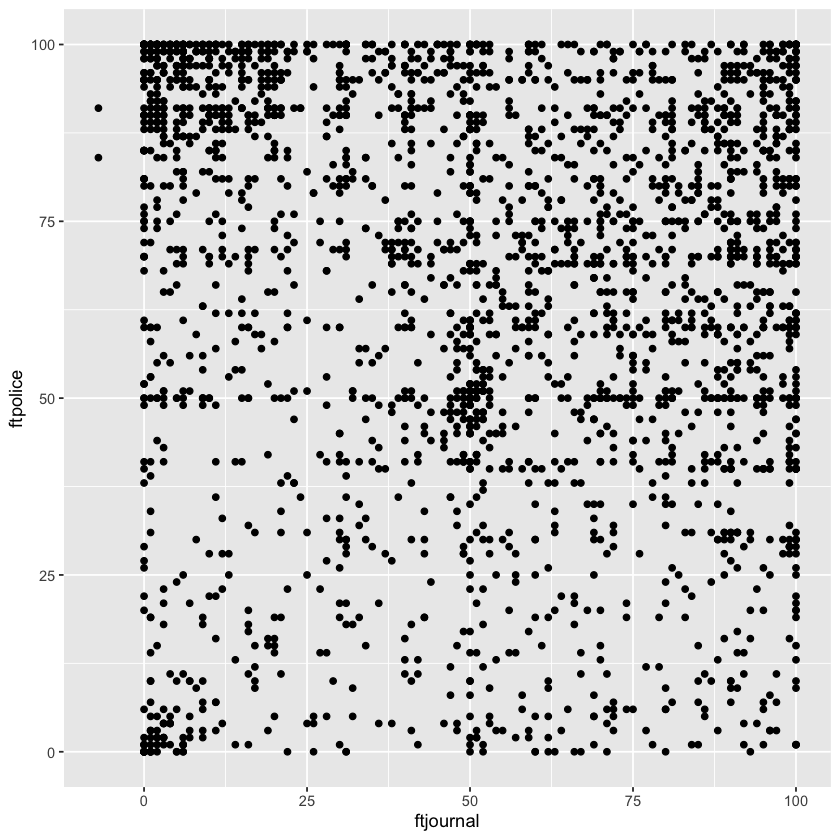

In [19]:
ggplot(A)  + 
  geom_point(aes(x = ftjournal, y = ftpolice))

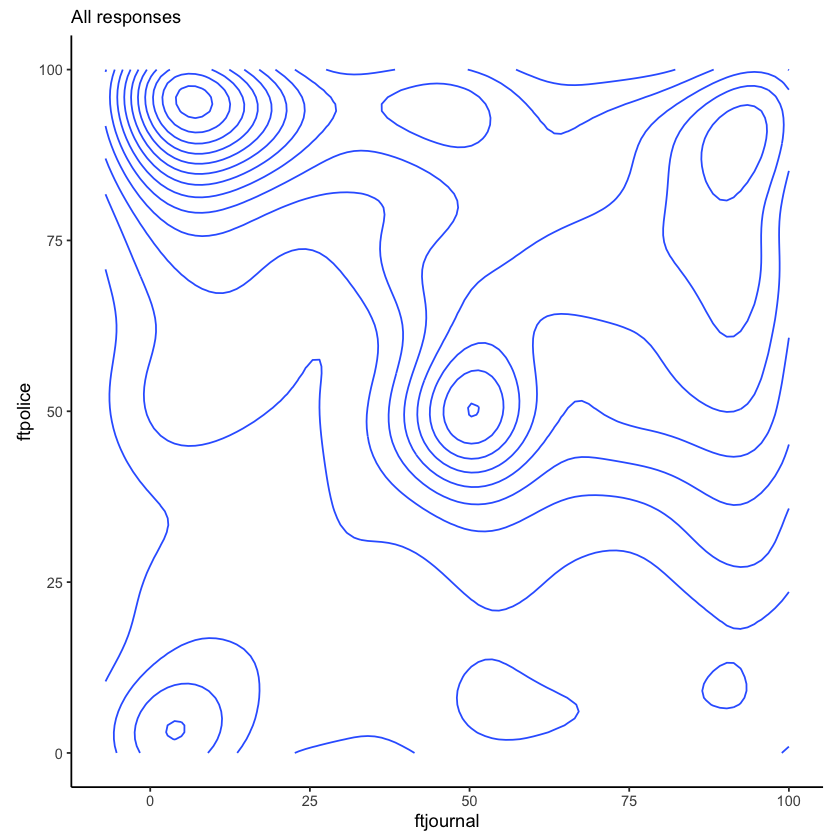

In [17]:
all.jp <- ggplot(A, aes(x = ftjournal, y = ftpolice))

all.jp + 
  geom_density_2d(aes(color = ftjournal)) + 
  labs(subtitle = "All responses") +
  my.theme

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

The test I will be conducting is the Two-Tailed T Test, because the data is Interval a t-test is appropriate.

The Null hypothesis is that $$H_0 = \mu_1 - \mu_2 = 0 $$
The alternative hypothesis $$H_A = \mu_1 - \mu_2 \ne 0 $$

We'll use a 0.5 signicance level

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [47]:
t.test(A$ftpolice, A$ftjournal)



	Welch Two Sample t-test

data:  A$ftpolice and A$ftjournal
t = 14.288, df = 4923.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.71619 14.12461
sample estimates:
mean of x mean of y 
  64.6848   52.2644 


The statistical significance of a p-value < 2.2e-16 means that we can reject the Null Hypothesis. 

The practical significance of the result is that we can ascertain that feelings towards police do not match feelings towards journalists, 
there is a stark difference. 

We can also see that the mean of ftpolice is higher than ftjournal which indicates that feelings are more favorable towards police than towards journalists. 

Does this mean US voters have more respect? I'm not sure if I can answer that question unless respect means 'more favorable and warm' opinions of.


## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

The topic is whether republican voters are older or younger than democratic voters

means that we can choose alot of different potiential variables for defining. 

voters / non-voters
those who only voted Democrat or Republican
those who mostly voted democrat or republican
those who mostly voted with some penalty
those who have no cross overs (pure or missing voters)
There's alot of ways to slice the pie. 


### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [102]:
A2 <- data.frame(A)




     pid1r             pid1d           birthyr        party          
 Min.   :-7.0000   Min.   :-7.000   Min.   :1927   Length:2500       
 1st Qu.:-1.0000   1st Qu.:-1.000   1st Qu.:1956   Class :character  
 Median :-1.0000   Median :-1.000   Median :1966   Mode  :character  
 Mean   : 0.4608   Mean   : 0.412   Mean   :1969                     
 3rd Qu.: 2.0000   3rd Qu.: 2.000   3rd Qu.:1983                     
 Max.   : 4.0000   Max.   : 4.000   Max.   :2000                     
      age       
 Min.   :18.00  
 1st Qu.:35.00  
 Median :52.00  
 Mean   :49.48  
 3rd Qu.:62.00  
 Max.   :91.00  

[1] 715

[1] 751

[1] "sanity check rows add up to 2500"


[1] TRUE

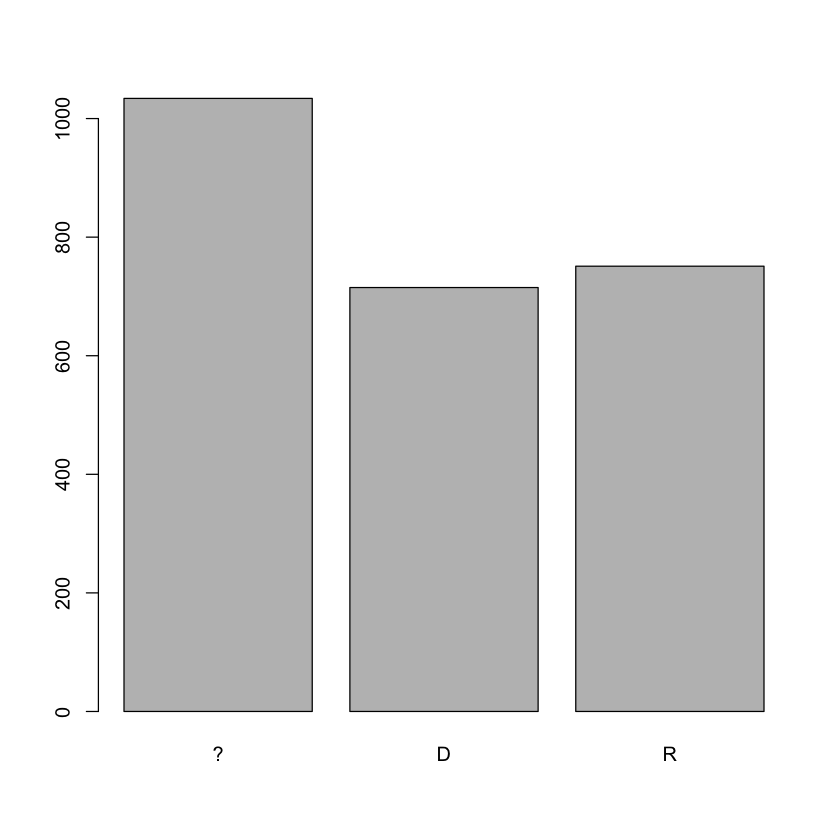

In [110]:
#party Identity (part 1 and 2)
#1 is democrat
#2 is republican
#3 is independent
#4 is something else

comb <- select(A2,pid1r,pid1d,birthyr)
#create a new party vector
p <- character()
age <- c()
for (row in 1:nrow(comb)){
    v1d = comb$pid1d[row] 
    v1r = comb$pid1r[row] 
    answer = "?"
    #convert numeric to character
    #D for democrat
    #R for republican
    #? for something else
    if (v1d > 0){
        if (v1d == 1){
            answer = "D"
        } else if (v1d == 2){
            answer = "R"
        } 
    } else if (v1r > 0){
         if (v1r == 1){
            answer = "R"
        } else if (v1r == 2){
            answer = "D"
        } 
    }
    p[row] = answer
    age[row] = 2018 - comb$birthyr[row]
}
comb$party = p
comb$age = age

summary(comb)
r = comb %>% filter(comb$party == "R")
d = comb %>% filter(comb$party == "D")
unk = comb %>% filter(comb$party == "?")
nrow(d)
nrow(r)
print("sanity check rows add up to 2500")
nrow(unk)+nrow(r)+nrow(d) == 2500
barplot(table(comb$party))

r_or_d = comb %>% filter(comb$party != "?")

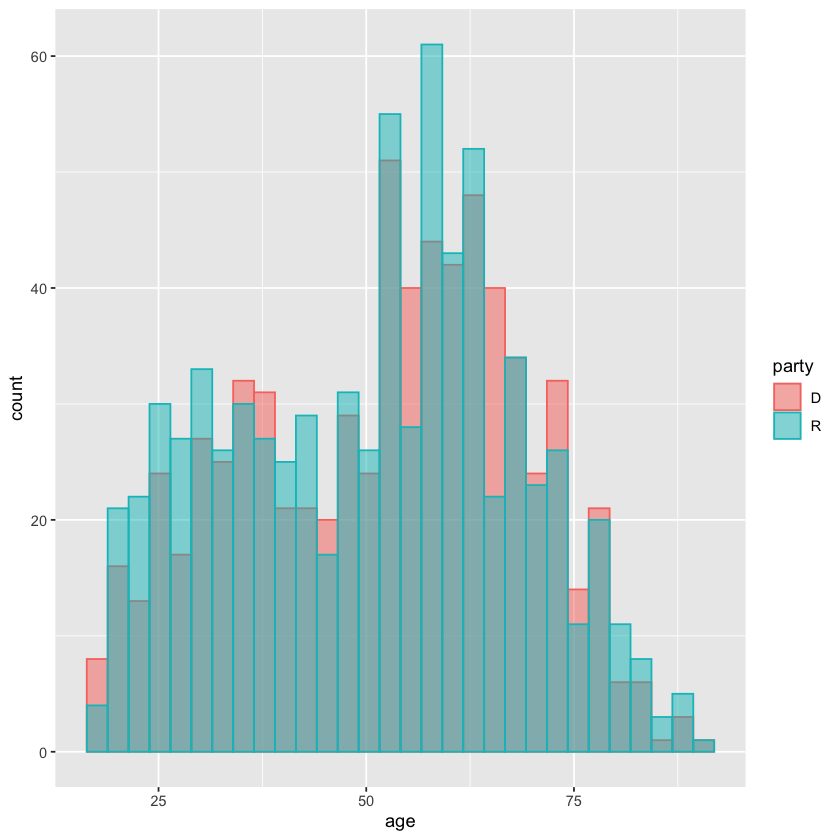

In [113]:
ggplot(r_or_d, aes(age, fill = party, color = party)) +
    geom_histogram(position = "identity", alpha = .5, bins = 30)

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

We know that 

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [115]:
t.test(age ~ party, data = r_or_d)


	Welch Two Sample t-test

data:  age by party
t = 1.2993, df = 1463.4, p-value = 0.1941
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5835786  2.8731319
sample estimates:
mean in group D mean in group R 
       51.90909        50.76431 


## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

Baseless = without sufficient evidence

In order to study this I'm going to use russia16 which asks:

"Do you think the Russian government probably interfered in the 2016 presidential election to try to help Donald Trump win, or do you think this probably did not happen?" 

Users can respond with 1, Russia probably interfered, or with 2, this probably did not happen. 


### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [135]:
#first get all independent voters
m <- select(A,pid1r,pid1d,russia16,muellerinv,coord16)
#create a new party vector
p <- character()
interfered <- c()
interfered_int <- c()
coordinated <- c()
for (row in 1:nrow(m)){
    v1d = m$pid1d[row] 
    v1r = m$pid1r[row] 
    answer = "?"
    #convert numeric parter to character
    #I for independent
    #? for something else
    if (v1d > 0){
        if (v1d == 3){
            answer = "I"
        } 
    } else if (v1r > 0){
         if (v1r == 3){
            answer = "I"
        } 
    }
    p[row] = answer
    
    #russia_interfered is our char value
    russia_interfered = "no"
    #russia_int is our bernoulli variable
    russia_int = 0
    if ( m$russia16[row] == 1){
        russia_interfered = "yes"
        russia_int = 1
    }
    interfered[row] = russia_interfered
    interfered_int[row] = russia_int
    
    
    #trump_coordinated
    trump_coordinated = "no"
    if ( m$coord16[row] == 1){
        trump_coordinated = "yes"
    }
    coordinated[row] = trump_coordinated
}

m$party = p
m$interfered = interfered
m$interfered_int = interfered_int
m$coordinated = coordinated

#summary(m)
I = m %>% filter(m$party == "I")
unk = m %>% filter(m$party == "?")
nrow(I)
print("sanity check rows add up to 2500")
nrow(unk)+nrow(I) == 2500



[1] 767

[1] "sanity check rows add up to 2500"


[1] TRUE

[1] "Independent voters if russia interfered"

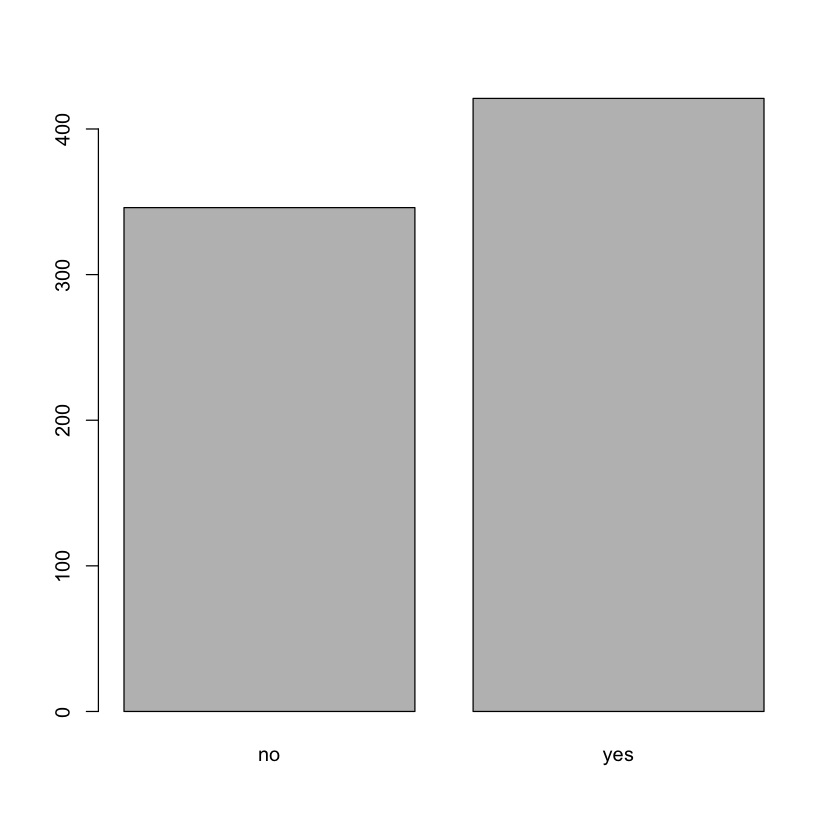

In [133]:
"Independent voters if russia interfered"
barplot(table(I$interfered))

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

$$ H_0: P = 0.5 $$

$$ H_A: P \ne 0.5 $$

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [136]:
t.test(I$interfered_int, mu=0.5)


	One Sample t-test

data:  I$interfered_int
t = 2.7194, df = 766, p-value = 0.006689
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5135975 0.5841861
sample estimates:
mean of x 
0.5488918 


We reject the null hypothesis

todo: add more text here

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

In [ ]:

changes in voter turnout

turnout16 #definitely voted = 1, definitely did not vote =2, not sure = 3
#if 3 chosen
turnout16b #probably voted = 1, probably did not vote = 2




### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.